In [99]:
import json
from os import walk
all_objects={}
objects_list=[]
f = []
images_paths=[]

path="/home/username/museum_project/britmus_images/"
for (dirpath, dirnames, filenames) in walk(path):
    f.extend(filenames)
    # print(dirpath+filenames[0])
    images_paths.extend([dirpath+filename for filename in filenames])
    break
print(len(f))
path="/home/username/museum_project/britmus_images2/"
for (dirpath, dirnames, filenames) in walk(path):
    f.extend(filenames)
    images_paths.extend([dirpath+filename for filename in filenames])
    break
print(len(f))
path="/home/username/museum_project/britmus_images3/"
for (dirpath, dirnames, filenames) in walk(path):
    f.extend(filenames)
    images_paths.extend([dirpath+filename for filename in filenames])
    break
print(len(f))

for i in f:
    # print(i)
    my_code=i.split("_")[0]
    museum_code=""
    c=0
    for l in i:
        if c:
            museum_code+=l
        if c==0 and l=="_":
            c=1
    museum_code=museum_code.split(".jpg")[0]
    # print(my_code,museum_code)
    if museum_code not in all_objects:
        all_objects[museum_code]={"my_code":my_code,"image_code":i}
        # objects_list.append(museum_code)
        # objects_list.append((my_code,museum_code))
        objects_list.append(i)
    # break
        
paths=[r"/home/username/museum_project/code/collect_dataset/british_museum_objects",r"/home/username/museum_project/code/collect_dataset/british_museum_objects2",r"/home/username/museum_project/code/collect_dataset/british_museum_objects3"]
# short_texts=[]
summ=0
import pandas as pd
from glob import glob
for path in paths:
    for file in glob(path+"/*"):
        # print(str(file))
        with open(file,encoding="utf-8") as f:
            df = pd.read_csv(f)
            nr=df["Museum number"]
            # print(nr)
            relevant_fields=["Museum number","Subjects","Curators Comments","Inscription","Technique","Materials","Production place","Production date","Assoc name","Culture","Object type","Producer name","School/style","Title"]
            elem=[i for i in range(len(nr)) if nr[i].replace("No: ","").replace(",","-").replace(".","-") in all_objects]
            for i in elem:
                key= nr[i].replace("No: ","").replace(",","-").replace(".","-")
                # print(i[0],key,i)
                if "about" not in all_objects[key]:
                    all_objects[key]["about"]={field:df[field][i] for field in relevant_fields}
        # break
# print(summ)
all_objects_labels={}
keys=list(all_objects.keys())
for key in all_objects:
    # all_objects_labels[key]=str(all_objects[key]["about"])
    temp_dict={}
    for col in all_objects[key]["about"]:
        if col not in ["Curators Comments","Museum number"] and str(all_objects[key]["about"][col])!="nan":
            temp_dict[col]=all_objects[key]["about"][col].replace("\n\n","\n").replace("(?)","").replace("probably","").replace("possibly","")
            if col=="Inscription":
                temp_dict[col]=temp_dict[col].lower().replace("inscription ","").replace("\n\n","\n")
            elif col=="Production place":
                temp_dict[col]=temp_dict[col].lower().replace("made in ","").replace("\n\n","\n")
            elif col=="Assoc name":
                temp_dict[col]=temp_dict[col].lower().replace("representation of:","").replace("\n\n","\n")
            
    all_objects_labels[key]=str(temp_dict)
    
    # all_objects_labels[key]=str({col:all_objects[key]["about"][col] for col in all_objects[key]["about"] if col not in ["Curators Comments","Museum number"] and str(all_objects[key]["about"][col])!="nan" and col=="Inscription"})

print(all_objects_labels[keys[0]])


    

54905
79824
119759
{'Subjects': 'war; classical mythology; attendant; african', 'Inscription': 'type: language: greek script: greek quoted: έπ]οίησ(ε)ν \nαμασις. transliteration: ep]ois(e)n \namasis translation: amasis made me  note: the reading of the is uncertain apart from the name of amasis.', 'Technique': 'painted; incised', 'Materials': 'pottery', 'Production place': 'made in: attica (greece)', 'Production date': '535BC (circa)', 'Assoc name': ' achilles;   penthesileia;   memnon', 'Culture': 'Attic; Archaic Greek', 'Object type': 'amphora', 'Producer name': 'Attributed to: Exekias (painter);  Made by: Exekias (potter, )'}


In [101]:
import re
from unidecode import unidecode
captions={}
count=0
punctuation=[".",",",";",":"," ","\n","'",":","\\n"]

def get_captions(keys):
    for k in keys:
        caption=""
        temp_dict={}
        for col in all_objects[k]["about"]:
            # print(col,"|||||",all_objects[k]["about"][col])
            if col=="Curators Comments" and str(all_objects[k]["about"][col]) !="nan":
                # print(all_objects[k]["about"][col])
                temp_dict[col]=all_objects[k]["about"][col].replace("\n\n","\n").replace("(?)","").replace("probably","").replace("possibly","")
                comments_keywords_string=get_keywords(temp_dict[col])
                temp_dict[col]=comments_keywords_string
            if col not in ["Curators Comments","Museum number"] and str(all_objects[k]["about"][col]) !="nan":
                temp_dict[col]=all_objects[k]["about"][col].replace("\n\n","\n").replace("(?)","").replace("probably","").replace("possibly","")
                if col=="Inscription":
                    temp_dict[col]=temp_dict[col].lower().replace("inscription","").replace("\n\n","\n")
                    temp_dict[col]=temp_dict[col].lower().replace("type","").replace("\n\n","\n")
                    temp_dict[col]=temp_dict[col].lower().replace("language","").replace("\n\n","\n")
                    temp_dict[col]=temp_dict[col].lower().replace("transliteration","").replace("\n\n","\n")
                    temp_dict[col]=temp_dict[col].lower().replace("translation","").replace("\n\n","\n")
                    temp_dict[col]=temp_dict[col].lower().replace("note","").replace("\n\n","\n")
                elif col=="Production place":
                    temp_dict[col]=temp_dict[col].lower().replace("made in","").replace("\n\n","\n")
                elif col=="Assoc name":
                    temp_dict[col]=temp_dict[col].lower().replace("representation of:","").replace("\n\n","\n")
                if col in ["Subjects","Materials"]:
                    temp_dict[col]=temp_dict[col].lower()
        
        for col in temp_dict:
            temp_dict[col]=temp_dict[col].replace("\n","")  
            temp_dict[col]=temp_dict[col].replace(":","")
            temp_dict[col]=temp_dict[col].replace(";",",")  
            temp_dict[col]=temp_dict[col].replace(".","")  
            temp_dict[col] = re.sub("\([^\)]*\)","", temp_dict[col])
            # # temp_dict[col] = re.sub("\(\w*\)","", temp_dict[col])
            # temp_dict[col] = re.sub("\s\s\s+","", temp_dict[col])
            # temp_dict[col] = re.sub("\s\s+"," ", temp_dict[col])
            words=temp_dict[col].split(" ")
            good_words=[]
            for gw in words:
                good_words.extend(gw.split(","))

            
            good_words=[w for w in good_words if w==unidecode(w)]
            # caption+=str(temp_dict[col])+", "
            for gw in good_words:
                if gw not in punctuation and gw !="":
                    if gw not in caption:
                        caption+=str(gw)+" "
                        # caption+=str(gw)+", " 
            



        
        captions[k]=caption
        # print(all_objects[k]["about"]["Curators Comments"])
        # print(all_objects[k]["about"])
        # print(caption)
        # print("-----------------------")
        # count+=1
        # print(count,k)
        # # break
        # if count>10:
        #     break
    return captions

In [102]:
from PIL import Image 
new_images_paths=[]
touched_keys=[]
for i in range(len(images_paths)):
    ki=images_paths[i].split("/")[-1].split("_")[-1].replace(".jpg","")
    try:
        Image.open(images_paths[i])
    except: 
        continue

    if ki in keys and ki not in touched_keys:
        new_images_paths.append(images_paths[i])
        touched_keys.append(ki)

print(len(touched_keys))

106611


In [115]:
import pandas as pd

def create_data(keys,ids,images_paths,captions):
    data={}   
    data['my_code']=[all_objects[i]['my_code'] for i in keys]
    data['image_code']=[all_objects[i]['image_code'] for i in keys]
    data['image_path']=[images_paths[i] for i in ids]
    data["caption"]=[captions[k] for k in keys]
    for k in all_objects[keys[0]]["about"].keys():
        data[k]=[all_objects[i]['about'][k] for i in keys]

    df = pd.DataFrame(data)
    return df
    # print(df)

In [105]:
keys_to_image_ids={}
for id,i in enumerate(new_images_paths):
    k=i.split("/")[-1].split("_")[-1].split(".")[0]
    # print(k,id,i)
    if k not in keys_to_image_ids:
        keys_to_image_ids[k]=id
    # print(keys_to_image_ids)
    # break


In [113]:
import random
# validation=random.sample(touched_keys,100)
# print(validation)
validation=random.sample(touched_keys,6000)

train=[]
ids_train=[]
ids_val=[]
for i,k in enumerate(touched_keys):
    if k not in validation:
        train.append(k)
        # print(keys_to_image_ids[k])
        # if k in keys_to_image_ids:
        ids_train.append(keys_to_image_ids[k])
    else:
        # if k in keys_to_image_ids:
        ids_val.append(keys_to_image_ids[k])

In [114]:
print(len(validation))
print(len(ids_val))

6000
6000


In [108]:
# captions=get_captions(validation)
# print(captions[validation[0]])
# print(validation[0])
# print(ids_val[0])
# print(keys_to_image_ids[validation[0]])

english quoted "186 stamps""ps 1861-" paper india 19thC Mughal dynasty album seal 
1990-0626-0-1-328
993
4559


In [116]:
# training_dataset=create_data(train, ids_train,new_images_paths)
# validation_dataset=create_data(validation,[keys_to_image_ids[k] for k in validation],new_images_paths)
training_dataset=create_data(train, [keys_to_image_ids[k] for k in train],new_images_paths,get_captions(train))
validation_dataset=create_data(validation,[keys_to_image_ids[k] for k in validation],new_images_paths,get_captions(validation))

In [110]:
nr=6
training_dataset.to_csv('/home/username/open_clip/finetuning/train'+str(nr)+'.csv', header=True, index=False)
validation_dataset.to_csv('/home/username/open_clip/finetuning/val'+str(nr)+'.csv', header=True, index=False)

In [86]:
count=0
c=0
print(len(new_images_paths), len(touched_keys))
for i,k in enumerate(touched_keys):
    # print(k,images_paths[i].split("/")[-1].split("_")[-1].replace(".jpg",""),k!= images_paths[i].split("/")[-1].split("_")[-1].replace(".jpg",""))
    if k!= new_images_paths[i].split("/")[-1].split("_")[-1].replace(".jpg",""):
        count+=1
    # if c>10:
    #     break
    # c+=1


print(count)

106611 106611
0


In [53]:
input_filename='/home/username/open_clip/finetuning/train.csv'
df = pd.read_csv(input_filename, sep=",")

### Better caption

In [ ]:
target="amphora, war, classical mythology, attendant, african, greek, amasis, painted, pottery, greece, attica, 535BC, achilles; penthesileia; memnon, Archaic Greek, Exekias"

In [ ]:
desired="""War; Classical Mythology; Attendant; African,
Greek inscription; uncertain reading except for the name Amasis; Amasis made me, 
Painted; Incised, 
Pottery, 
Attica (Greece), 
535 BC (circa), 
Achilles; Penthesileia; Memnon, 
Attic; Archaic Greek, 
Amphora, 
Producer Exekias; Exekias"""
inscription="""'Inscription': 'type: language: greek script: greek quoted: έπ]οίησ(ε)ν \nαμασις. 
transliteration: ep]ois(e)n \namasis translation: amasis made me  note: the reading of the is uncertain apart from the name of amasis.'"""

In [75]:
# import re
# from unidecode import unidecode
# captions={}
# count=0
# punctuation=[".",",",";",":"," ","\n","'",":","\\n"]
# for k in keys:
#     caption=""
#     temp_dict={}
#     for col in all_objects[k]["about"]:
#         # print(col,"|||||",all_objects[k]["about"][col])
#         if col=="Curators Comments":
#             temp_dict[col]=all_objects[k]["about"][col].replace("\n\n","\n").replace("(?)","").replace("probably","").replace("possibly","")
#             comments_keywords_string=get_keywords(temp_dict[col])
#             temp_dict[col]=comments_keywords_string
#         if col not in ["Curators Comments","Museum number"] and str(all_objects[k]["about"][col]) !="nan":
#             temp_dict[col]=all_objects[k]["about"][col].replace("\n\n","\n").replace("(?)","").replace("probably","").replace("possibly","")
#             if col=="Inscription":
#                 temp_dict[col]=temp_dict[col].lower().replace("inscription","").replace("\n\n","\n")
#                 temp_dict[col]=temp_dict[col].lower().replace("type","").replace("\n\n","\n")
#                 temp_dict[col]=temp_dict[col].lower().replace("language","").replace("\n\n","\n")
#                 temp_dict[col]=temp_dict[col].lower().replace("transliteration","").replace("\n\n","\n")
#                 temp_dict[col]=temp_dict[col].lower().replace("translation","").replace("\n\n","\n")
#                 temp_dict[col]=temp_dict[col].lower().replace("note","").replace("\n\n","\n")
#             elif col=="Production place":
#                 temp_dict[col]=temp_dict[col].lower().replace("made in","").replace("\n\n","\n")
#             elif col=="Assoc name":
#                 temp_dict[col]=temp_dict[col].lower().replace("representation of:","").replace("\n\n","\n")
#             if col in ["Subjects","Materials"]:
#                 temp_dict[col]=temp_dict[col].lower()
    
#     for col in temp_dict:
#         temp_dict[col]=temp_dict[col].replace("\n","")  
#         temp_dict[col]=temp_dict[col].replace(":","")
#         temp_dict[col]=temp_dict[col].replace(";",",")  
#         temp_dict[col]=temp_dict[col].replace(".","")  
#         temp_dict[col] = re.sub("\([^\)]*\)","", temp_dict[col])
#         # # temp_dict[col] = re.sub("\(\w*\)","", temp_dict[col])
#         # temp_dict[col] = re.sub("\s\s\s+","", temp_dict[col])
#         # temp_dict[col] = re.sub("\s\s+"," ", temp_dict[col])
#         words=temp_dict[col].split(" ")
#         good_words=[]
#         for gw in words:
#             good_words.extend(gw.split(","))

        
#         good_words=[w for w in good_words if w==unidecode(w)]
#         # caption+=str(temp_dict[col])+", "
#         for gw in good_words:
#             if gw not in punctuation and gw !="":
#                 if gw not in caption:
#                     caption+=str(gw)+" "
#                     # caption+=str(gw)+", " 
        



    
#     captions[k]=caption.lower()
#     # print(all_objects[k]["about"]["Curators Comments"])
#     # print(all_objects[k]["about"])
#     # print(caption)
#     # print("-----------------------")
#     # count+=1
#     # # break
#     # if count>10:
#     #     break

{'Museum number': 'No: 1849,0518.10', 'Subjects': 'war; classical mythology; attendant; african', 'Curators Comments': "[Text from BM catalogue of vases]\n Wiener Vorlegebl. 1889, pl. iii. 3; Gerhard, A.V. iii. 207, and p. 117; Panofka in Arch. Zeit. 1846, pl. 39, figs. 2, 3; Rev. Phil. ii. p. 391; Brunn, Künstlergesch. ii. p. 656; Loeschcke in Arch. Zeit. 1881, p. 31, n. 9, and in Bonner Studien, p. 248; Corey, Amaz. Ant. Fig. p. 61; Klein, Meistersig. p. 43; Schneider, Tro. Sagenkr. p. 137; C.I.Gr. 8128; Leaf in J.H.S. iv. p. 83.\nFor Memnon's hair, (κέρατα) cf. Helbig, Hom. Epos1, p. 241. For the cuirass, see J.H.S. v. p.235. \nLoeschcke has shown that this is an imitation of Amasis' work, probably by Exekias, who copied the former's signature. Cf. Vase Β471 and Β210. It is possible that Αμασις may be the name of one of the Africans; έπ]οίησ(ε)ν is very doubtful.; For a detailed assessment, see Mackay 2010, 201-213 and pls. 49-51. For a discussion of the scenes on the present vase i

AttributeError: 'float' object has no attribute 'replace'

In [4]:
# %pip install git+https://github.com/LIAAD/yake
import yake

def get_keywords(text):
    text=text.replace("\n","")

    language = "en"
    max_ngram_size = 3
    deduplication_thresold = 0.9
    deduplication_algo = 'seqm'
    windowSize = 1
    numOfKeywords = 10

    kw_extractor = yake.KeywordExtractor(lan=language, 
                                        n=max_ngram_size, 
                                        dedupLim=deduplication_thresold, 
                                        dedupFunc=deduplication_algo, 
                                        windowsSize=windowSize, 
                                        top=numOfKeywords)
    keywords = kw_extractor.extract_keywords(text)

    # for kw in keywords:
    #     print(kw)

    kw=[i[0] for i in keywords]
    keywords_temp=[]
    for i in kw:
        i_temp=i.split(" ")
        keywords_temp.extend([j.lower() for j in i_temp])

    keywords_string=""
    for i in keywords_temp:
        if i not in keywords_string:
            keywords_string+=i+" "
    # print(keywords_string)

    return keywords_string

text="{'Subjects': 'war; classical mythology; attendant; african', 'Inscription': 'type: language: greek script: greek quoted: έπ]οίησ(ε)ν \nαμασις. transliteration: ep]ois(e)n \namasis translation: amasis made me  note: the reading of the is uncertain apart from the name of amasis.', 'Technique': 'painted; incised', 'Materials': 'pottery', 'Production place': 'made in: attica (greece)', 'Production date': '535BC (circa)', 'Assoc name': ' achilles;   penthesileia;   memnon', 'Culture': 'Attic; Archaic Greek', 'Object type': 'amphora', 'Producer name': 'Attributed to: Exekias (painter);  Made by: Exekias (potter, )'}"
text="""
[Text from BM catalogue of vases]
 Wiener Vorlegebl. 1889, pl. iii. 3; Gerhard, A.V. iii. 207, and p. 117; Panofka in Arch. Zeit. 1846, pl. 39, figs. 2, 3; Rev. Phil. ii. p. 391; Brunn, Künstlergesch. ii. p. 656; Loeschcke in Arch. Zeit. 1881, p. 31, n. 9, and in Bonner Studien, p. 248; Corey, Amaz. Ant. Fig. p. 61; Klein, Meistersig. p. 43; Schneider, Tro. Sagenkr. p. 137; C.I.Gr. 8128; Leaf in J.H.S. iv. p. 83.
For Memnon's hair, (κέρατα) cf. Helbig, Hom. Epos1, p. 241. For the cuirass, see J.H.S. v. p.235. 
Loeschcke has shown that this is an imitation of Amasis' work, probably by Exekias, who copied the former's signature. Cf. Vase Β471 and Β210. It is possible that Αμασις may be the name of one of the Africans; έπ]οίησ(ε)ν is very doubtful.; For a detailed assessment, see Mackay 2010, 201-213 and pls. 49-51. For a discussion of the scenes on the present vase in the context of Greek depictions of racial differences, see Bérard 2000, 395-402 (esp. 395-7 and fig. 15.5).
Bibliography:
Bérard, C. 2000, 'The image of the Other and the foreign hero', in B. Cohen (ed.), Not the Classical ideal. Athens and the construction of the Other in Greek art (Leiden: Brill), 390-412. 
Mackay, E.A. 2010, Tradition and originality. A study of Exekias. BARIS 2092 (Oxford: Archaeopress)."""
# text=""" This ram aquamanile and another similar were looted from Benin City in 1897 by Captain Herbert Walker. They were sold as a pair (lot 79) at a Mssrs Foster auction on 16 July 1931 by the Wellcome Historical Medical Museum. This aquamanile was then donated to the Museum by the WHMM in 1954. The second aquamanile was subsequently sold through Sotheby's (7 December 1953) to the Nigerian government. It is now in the collections of the National Museum Lagos (accession number 53.22.2).  
# The two aquamanile were possibly made as a pair; alternatively the Lagos aquamanile may have been made to replace the damaged British Museum ram.; Rams are regarded as symbols of masculinity in Benin and were sacrificial animals at the annual Ague ceremony. 
# Ram aquamanile were used by the Oba to wash his hands during the closing rites of the Ague ceremony in the royal palace in Benin City (Curnow, 1997).
#  """
result=get_keywords(text)
print(result)
# print(type(result))


wiener vorlegebl text panofka in arch iii catalogue exekias bérard 


In [ ]:
# %pip install unidecode
from unidecode import unidecode


inscription="""'Inscription': 'type: language: greek script: greek quoted: έπ]οίησ(ε)ν \nαμασις. 
transliteration: ep]ois(e)n \namasis translation: amasis made me  note: the reading of the is uncertain apart from the name of amasis.'"""


alphabet=[]
for i in range(26):
    alphabet.append(chr(ord("a")+i))
print(alphabet)
punctuation=[".",",",";",":"," ","\n","'",":"]
for id,i in enumerate(inscription):
    # symbol=unidecode(i)
    # print(symbol)
    symbol=i.lower()
    if symbol not in alphabet and symbol not in punctuation:
        # print(symbol)
        inscription=inscription.replace(symbol,"")
for id,i in enumerate(inscription):
    if symbol in punctuation:
        if id>0 and id<len(inscription)-1:
            prev_id=id-1
            post_id=id+1
            if inscription[prev_id] in punctuation and inscription[post_id] in punctuation:
                inscription=inscription.replace(inscription[prev_id]+inscription[id]+inscription[post_id]," ")

useless_words=["type","translation","transliteration"]
for w in useless_words:
    inscription=inscription.replace(w,"")
print(inscription)

In [46]:
# %pip install unidecode
from unidecode import unidecode
print(unidecode("έπ]οίησ(ε)ν"))
print("έπ]οίησ(ε)ν")
# print("έ" in alphabet)
print("έπ]οίησ(ε)ν"==unidecode("έπ]οίησ(ε)ν"))

ep]oies(e)n
έπ]οίησ(ε)ν
False


In [ ]:
# import spacy
# from collections import Counter
# import spacy
# spacy.cli.download('en_core_web_sm')

# #text example=u'something'

# def get_keywords(text):
#     text=text.replace("\n","")


#     nlp = spacy.load("en_core_web_sm")
#     doc = nlp(text)
#     words = [token.text
#             for token in doc
#             if not token.is_stop and not token.is_punct]

#     # noun tokens that arent stop words or punctuations
#     nouns = [token.text
#             for token in doc
#             if (not token.is_stop and
#                 not token.is_punct and
#                 token.pos_ == "NOUN")]

#     # five most common tokens
#     word_freq = Counter(words)
#     common_words = word_freq.most_common(10)

#     # five most common noun tokens
#     noun_freq = Counter(nouns)
#     common_nouns = noun_freq.most_common(10)
#     print(common_nouns,common_words)

# text="{'Subjects': 'war; classical mythology; attendant; african', 'Inscription': 'type: language: greek script: greek quoted: έπ]οίησ(ε)ν \nαμασις. transliteration: ep]ois(e)n \namasis translation: amasis made me  note: the reading of the is uncertain apart from the name of amasis.', 'Technique': 'painted; incised', 'Materials': 'pottery', 'Production place': 'made in: attica (greece)', 'Production date': '535BC (circa)', 'Assoc name': ' achilles;   penthesileia;   memnon', 'Culture': 'Attic; Archaic Greek', 'Object type': 'amphora', 'Producer name': 'Attributed to: Exekias (painter);  Made by: Exekias (potter, )'}"
# get_keywords(text)

### See alignment

In [ ]:
import matplotlib.pyplot as plt

val_ids=[]
for id,i in enumerate(images_paths):
    if i.split("/")[-1].split("_")[-1].split(".")[0] in validation:
        val_ids.append(id)

count=0
for j,i in enumerate(val_ids):
    # print(validation[j])
    print(images_paths[i])
    key=images_paths[i].split("/")[-1].split("_")[-1].split(".")[0]
    print(key)
    elem=Image.open("/home/username/museum_project/britmus_images/003749_118892.jpg")
    plt.imshow(elem)
    plt.show()
    if count>10:
        break
    count+=1
    print(captions[key])
    print("--------------------------")
    break


2009-6017-328 wheel-thrown mould-made pottery 12thC-13thC Middle Islamic jar 
88022 2009-6017-328


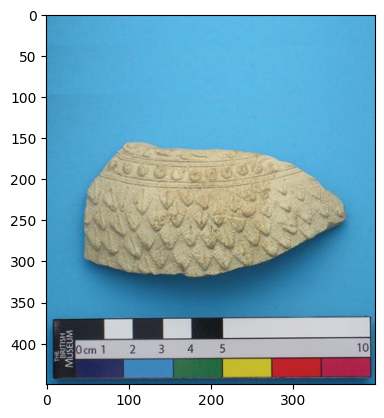

In [84]:
data={}
data["caption"]=[captions[k] for k in validation]

for i in range(len(validation)):
    print(validation[i],data["caption"][i])
    break

for i in range(len(images_paths)):
    key=images_paths[i].split("/")[-1].split("_")[-1].split(".")[0]
    # 
    if key==validation[0]:
        print(i,key)
        elem=Image.open(images_paths[i])
        plt.imshow(elem)
        plt.show()

In [ ]:
# captions={}
# for k in keys:
#     caption=""
#     temp_dict={}
#     for col in all_objects[k]["about"]:
#         # print(col,"|||||",all_objects[k]["about"][col])
#         if col not in ["Curators Comments","Museum number"] and str(all_objects[k]["about"][col]) !="nan":
#             temp_dict[col]=all_objects[k]["about"][col].replace("\n\n","\n").replace("(?)","").replace("probably","").replace("possibly","")
#             if col=="Inscription":
#                 temp_dict[col]=temp_dict[col].lower().replace("inscription ","").replace("\n\n","\n")
#             elif col=="Production place":
#                 temp_dict[col]=temp_dict[col].lower().replace("made in ","").replace("\n\n","\n")
#             elif col=="Assoc name":
#                 temp_dict[col]=temp_dict[col].lower().replace("representation of:","").replace("\n\n","\n")
#             if col in ["Subjects","Materials"]:
#                 temp_dict[col]=temp_dict[col].lower()
                
#     for col in temp_dict:
#         caption+=str(col)+": "+str(temp_dict[col])+", " 
    
#     captions[k]=caption
#     print(caption)
#     break